In [ ]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0001174820"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0001174820
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,CENTER FINANCIAL CORP
Ticker,CLFC


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
interest income,28.0,2.622061e+07,6.917709e+06,12562000.0,23053750.0,25032500.0,32318750.0,37098000.0
net income,28.0,2.670321e+06,6.910708e+06,-24467000.0,3091000.0,4890000.0,6352500.0,9393000.0
net interest income,20.0,1.432480e+07,3.333804e+06,8239000.0,11232250.0,15952000.0,16934500.0,18099000.0
provision for loan losses,28.0,4.620214e+06,5.352945e+06,257000.0,1100000.0,2123000.0,6257500.0,22625000.0


# Plots

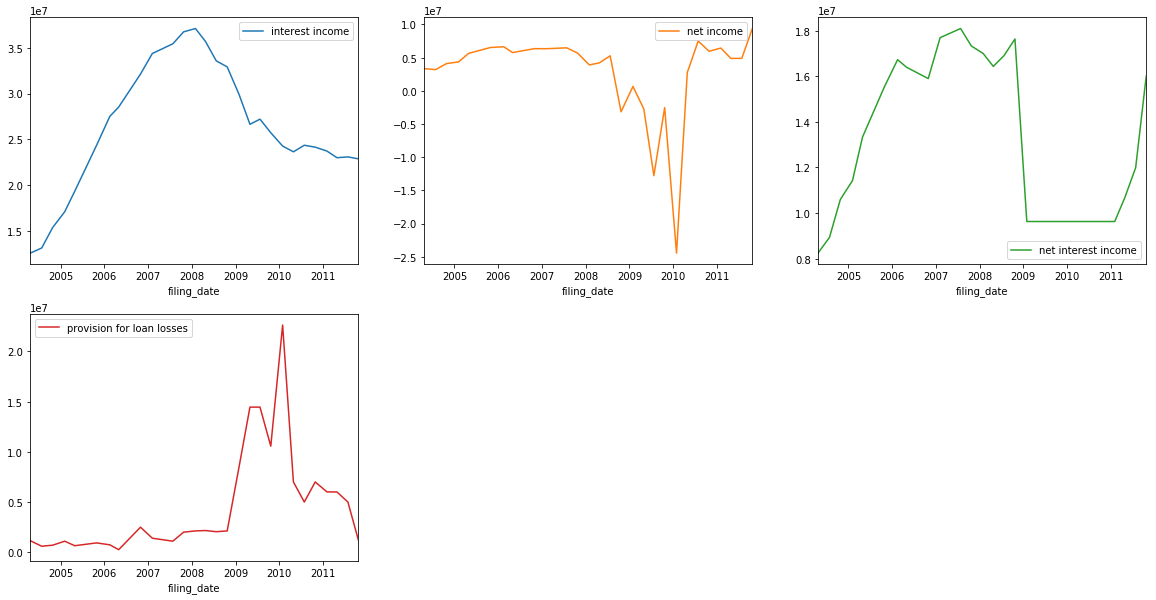

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                              
0001174820 book value per share                              None    empty   
           interest income                                 2005Q2  missing   
           interest income                                 2006Q2  missing   
           interest income                                 2007Q1  missing   
           net income                                      2005Q2  missing   
           net income                                      2006Q2  missing   
           net income                                      2007Q1  missing   
           net interest income                             2005Q2  missing   
           net interest income                             2006Q2  missing   
           net interest income                             2007Q1  missing   
           net interest income        2009Q1 to 2010Q4: 8 periods  missing   
           provision for loan losses                       2005Q2  missing   
           provision for loan losses                       2006Q2  missing   
           provision for loan losses                       2007Q1  missing   
           provision for loan losses                       2009Q2  missing   
           provision for loan losses                       2010Q3  missing   
           total revenue                                     None    empty   

                                                 message  
cik        item                                           
0001174820 book value per share       No values for item  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()